<a href="https://colab.research.google.com/github/navanil018/Kaggle/blob/master/Kaggle_Heart_Disease_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## All imports ###
from google.colab import drive

import os
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
#Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
#drive.mount('/content/drive')

!ls "/content/drive/"
loc = "/content/drive/My Drive/Kaggle/Heart_Disease/heart.csv"

data = pd.read_csv(loc)
data.head()

'My Drive'


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


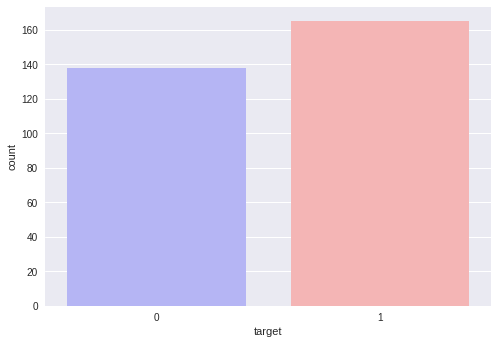

In [11]:
#plotting the target values
sns.countplot(x = 'target', data = data, palette = 'bwr')
plt.show()

In [15]:
#percentage of patients with/without heart disease

countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])

print("Percentage of patients without heart disease: {:.2f}%".format((countNoDisease / (len(data.target)) * 100)))
print("Percentage of patients with heart disease: {:.2f}%".format((countHaveDisease / (len(data.target)) * 100)))

Percentage of patients without heart disease: 45.54%
Percentage of patients with heart disease: 54.46%


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


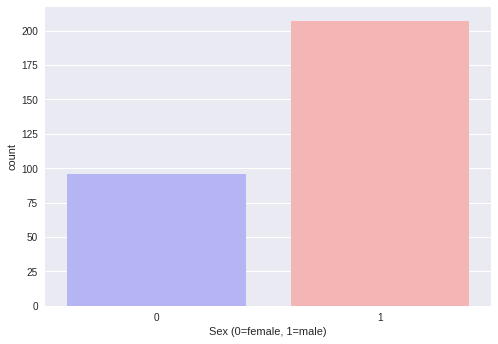

In [21]:
sns.countplot(x = 'sex', data = data, palette='bwr')
plt.xlabel("Sex (0=female, 1=male)")
plt.show()

In [27]:
#percentage of male and female

countMale = len(data[data.sex == 1])
countFemale = len(data[data.sex == 0])

print("Percentage of Male: {:.2f}%".format((countMale / (len(data.sex)) * 100)))
print("Percentage of Female: {:.2f}%".format((countFemale / (len(data.sex)) * 100)))

Percentage of Male: 68.32%
Percentage of Female: 31.68%


In [28]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


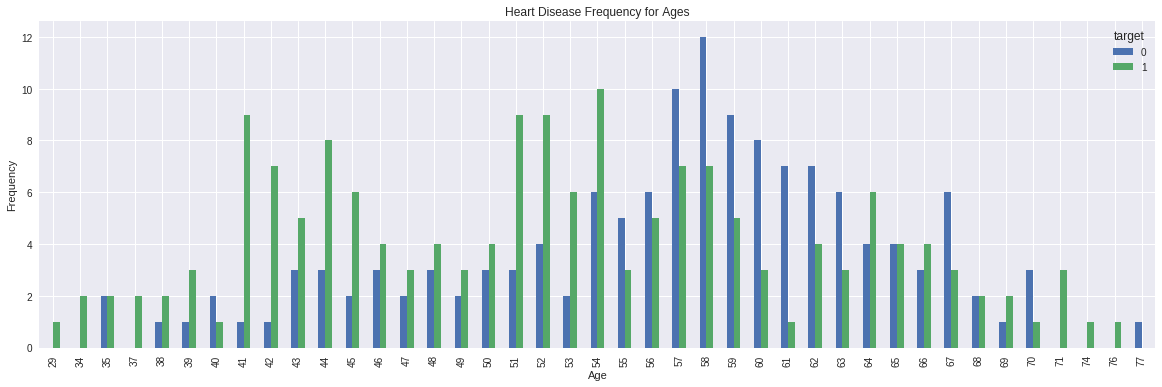

In [30]:
pd.crosstab(data.age,data.target).plot(kind = 'bar', figsize=(20,6))

plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

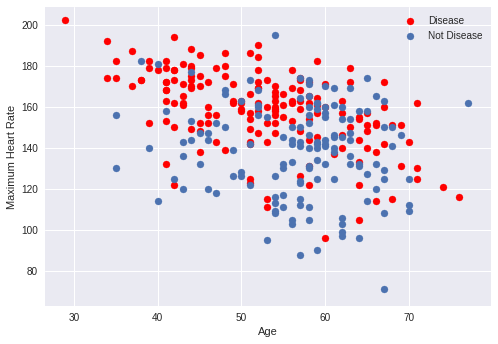

In [31]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [0]:
#creating model for logistic regression

y = data.target.values
x_data = data.drop(['target'], axis = 1)

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)